<a href="https://colab.research.google.com/github/vivek-44/Project-/blob/main/Hindi_character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/suvooo/hindi-character-recognition/data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/hindi_dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')
#from google.colab import drive
#drive.mount('/content/drive')

finish


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [ ]:
# Train and Test Directory
train_dir = '/content/DevanagariHandwrittenCharacterDataset/Train'
test_dir = '/content/DevanagariHandwrittenCharacterDataset/Test'

In [ ]:
# Total number of classes in the dataset
classes = os.listdir(train_dir)
print(len(classes))
classes

46


['character_34_chhya',
 'character_17_tha',
 'character_9_jha',
 'character_12_thaa',
 'character_20_na',
 'character_4_gha',
 'digit_1',
 'character_30_motosaw',
 'digit_3',
 'character_19_dha',
 'digit_0',
 'character_1_ka',
 'character_16_tabala',
 'character_25_ma',
 'digit_5',
 'character_29_waw',
 'digit_9',
 'character_28_la',
 'digit_6',
 'character_6_cha',
 'digit_7',
 'character_5_kna',
 'character_3_ga',
 'character_21_pa',
 'character_35_tra',
 'character_24_bha',
 'character_36_gya',
 'digit_4',
 'character_26_yaw',
 'character_15_adna',
 'digit_8',
 'character_32_patalosaw',
 'character_14_dhaa',
 'character_7_chha',
 'character_27_ra',
 'character_18_da',
 'digit_2',
 'character_22_pha',
 'character_33_ha',
 'character_8_ja',
 'character_31_petchiryakha',
 'character_2_kha',
 'character_10_yna',
 'character_13_daa',
 'character_23_ba',
 'character_11_taamatar']

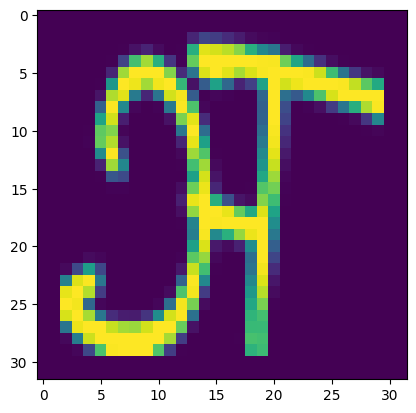

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10542.png')

# Display image
plt.imshow(img)
plt.show()

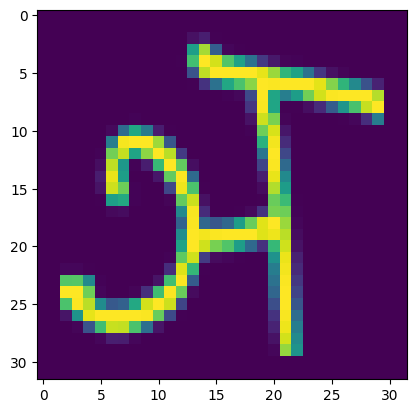

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10576.png')

# Display image
plt.imshow(img)
plt.show()

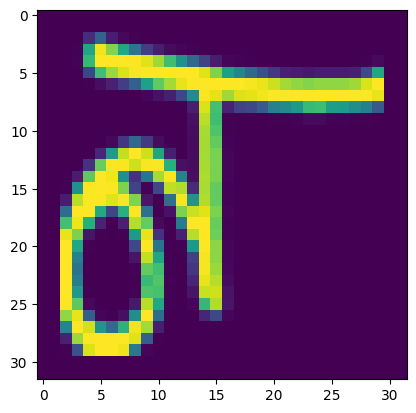

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_20_na/11061.png')

# Display image
plt.imshow(img)
plt.show()

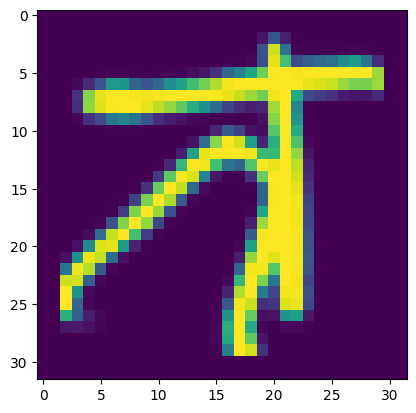

In [ ]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_35_tra/102522.png')

# Display image
plt.imshow(img)
plt.show()

In [ ]:
hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()

In [ ]:
# Generating Class label
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()

In [ ]:
# Creating Batches

#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=train_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')
#image_dataset_from_directory function is used to create a dataset from image files in a directory.
#batch_size=32 Organizes the data into batches of 32 samples.

testting_dataset = image_dataset_from_directory(directory=test_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)
#shuffle=false Ensures that the testing dataset is not shuffled

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [ ]:
# Architechture of the CNN

model = tf.keras.Sequential([layers.Rescaling(1./255),])         #Rescales the input pixel values between 0 and 1

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,       # Specifies the number of filters
            kernel_size = (3,3),
            strides = 1,            # A stride of 1 means the kernel moves one pixel at a time.
            activation = "relu",        #Applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.
            input_shape = (32,32,3)))       #it's a 3D tensor with a shape of (32, 32, 3), indicating an image with dimensions 32x32 pixels and three color channels (RGB).

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),  #This layer performs max pooling on the input data, reducing the spatial dimensions.
            strides=(2, 2),     # A stride of 2 means the window moves two pixels at a time.
            padding="same"))    # The input so that the output size is the same as the input size.

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
            kernel_size = (3,3),
            strides = 1,
            activation = "relu",
            input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))


#Layers 3-----------------------------------------------------------
model.add(Convolution2D(filters = 64,
            kernel_size = (3,3),
            strides = 1,
            activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
            kernel_size = (3,3),
            strides= 1,
            activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))
model.add(Flatten())    #Flattens the output from the convolutional layers into a 1D array before transitioning to fully connected layers.

#Fully Connected Layer 1----------------
model.add(Dense(128,
        activation = "relu",
        kernel_initializer = "uniform"))
model.add(BatchNormalization())         #fully connected (dense) layers are defined with ReLU activations and batch normalization.

#Fully Connected Layer 2----------------
model.add(Dense(64,
        activation = "relu",
        kernel_initializer = "uniform")) # Each weight is randomly sampled from a uniform distribution, providing some randomness to the initial weights.
model.add(BatchNormalization())         #fully connected (dense) layers are defined with ReLU activations and batch normalization.

#Fully Connected Layer 3----------------
model.add(Dense(46,
        activation = "softmax",
        kernel_initializer = "uniform"))    #fully connected (dense) layers are defined with ReLU activations and batch normalization.

In [ ]:
# Compile Model
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Model fitting on the loaded dataset
model_history = model.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 25,) #The number of times the model is trained and tested.

Epoch 1/25
2444/2444 [==============================] - 149s 59ms/step - loss: 0.5022 - accuracy: 0.8736 - val_loss: 0.1475 - val_accuracy: 0.9551
Epoch 2/25
2444/2444 [==============================] - 141s 57ms/step - loss: 0.1300 - accuracy: 0.9602 - val_loss: 0.1169 - val_accuracy: 0.9652
Epoch 3/25
2444/2444 [==============================] - 145s 59ms/step - loss: 0.0973 - accuracy: 0.9696 - val_loss: 0.1128 - val_accuracy: 0.9660
Epoch 4/25
2444/2444 [==============================] - 147s 60ms/step - loss: 0.0774 - accuracy: 0.9757 - val_loss: 0.0931 - val_accuracy: 0.9715
Epoch 5/25
2444/2444 [==============================] - 146s 60ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0767 - val_accuracy: 0.9772
Epoch 6/25
2444/2444 [==============================] - 145s 60ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0834 - val_accuracy: 0.9772
Epoch 7/25
2444/2444 [==============================] - 148s 60ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0

1/1 [==============================] - 0s 27ms/step
Actual_class : ३
Predicted Class :  ३


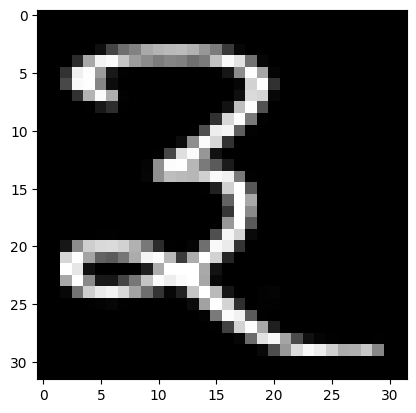

In [ ]:

import cv2
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/digit_3/12594.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ३")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 21ms/step
Actual_class : झ
Predicted Class :  झ


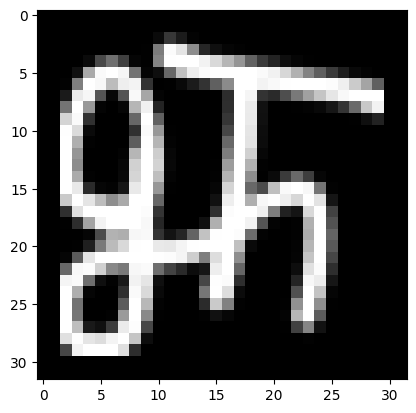

In [ ]:
test_img_2 = test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_9_jha/12230.png")
plt.imshow(test_img_2)
test_img_2 = cv2.resize(test_img_2,(32,32))
test_input = test_img_2.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : झ")
print("Predicted Class : " ,hindi_character[class_number])